In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report/2015.csv
/kaggle/input/world-happiness-report/2021.csv
/kaggle/input/world-happiness-report/2017.csv
/kaggle/input/world-happiness-report/2019.csv
/kaggle/input/world-happiness-report/2020.csv
/kaggle/input/world-happiness-report/2018.csv
/kaggle/input/world-happiness-report/2022.csv
/kaggle/input/world-happiness-report/2016.csv


In [2]:
# read file
df22 = pd.read_csv('/kaggle/input/world-happiness-report/2022.csv')

In [3]:
df22.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [4]:
df22.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [5]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [6]:
#rename columns
df22 = df22.rename(columns={'Explained by: GDP per capita':'Economy',
                          'Explained by: Social support':'Social support',
                          'Explained by: Healthy life expectancy':'Health',
                          'Explained by: Freedom to make life choices':'Freedom',
                          'Explained by: Generosity':'Generosity',
                          'Explained by: Perceptions of corruption':'Corruption'})
df22.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [7]:
#drop unreated columns
df22 = df22.drop(columns=['Whisker-high','Whisker-low'])

In [8]:
df22

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [9]:
# Look in detail for row 146 that contains null values
df22[df22['RANK']==147]

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# drop row #146
df22 = df22.drop(df22[df22['RANK']==147].index, inplace=False)
df22

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,"3,471","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,143,Rwanda*,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [11]:
# check duplicated country
df22['Country'].nunique()

146

In [12]:
# replace values of commas with dot

df22['Happiness score'] =  df22['Happiness score'].apply(lambda x: str(x).replace(',', '.'))
df22['Dystopia (1.83) + residual'] =  df22['Dystopia (1.83) + residual'].apply(lambda x: str(x).replace(',', '.'))
df22['Economy'] =  df22['Economy'].apply(lambda x: str(x).replace(',', '.'))
df22['Social support'] =  df22['Social support'].apply(lambda x: str(x).replace(',', '.'))
df22['Health'] =  df22['Health'].apply(lambda x: str(x).replace(',', '.'))
df22['Freedom'] =  df22['Freedom'].apply(lambda x: str(x).replace(',', '.'))
df22['Generosity'] =  df22['Generosity'].apply(lambda x: str(x).replace(',', '.'))
df22['Corruption'] =  df22['Corruption'].apply(lambda x: str(x).replace(',', '.'))
df22.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [13]:
# change data types
df22 = df22.astype({'Happiness score': 'float32',
            'Dystopia (1.83) + residual': 'float32',
            'Economy':'float32',
            'Social support':'float32',
            'Health':'float32',
            'Freedom':'float32',
            'Generosity':'float32',
            'Corruption':'float32'})

In [14]:
df22.dtypes

RANK                            int64
Country                        object
Happiness score               float32
Dystopia (1.83) + residual    float32
Economy                       float32
Social support                float32
Health                        float32
Freedom                       float32
Generosity                    float32
Corruption                    float32
dtype: object

In [15]:
# round the values into 2 decimal places
df22['Happiness score'] =  df22['Happiness score'].apply(lambda x:round(x,2))
df22['Dystopia (1.83) + residual'] =  df22['Dystopia (1.83) + residual'].apply(lambda x:round(x,2))
df22['Economy'] =  df22['Economy'].apply(lambda x:round(x,2))
df22['Social support'] =  df22['Social support'].apply(lambda x:round(x,2))
df22['Health'] =  df22['Health'].apply(lambda x:round(x,2))
df22['Freedom'] =  df22['Freedom'].apply(lambda x:round(x,2))
df22['Generosity'] =  df22['Generosity'].apply(lambda x:round(x,2))
df22['Corruption'] =  df22['Corruption'].apply(lambda x:round(x,2))
df22.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,7.82,2.52,1.89,1.26,0.77,0.74,0.11,0.53
1,2,Denmark,7.64,2.23,1.95,1.24,0.78,0.72,0.19,0.53
2,3,Iceland,7.56,2.32,1.94,1.32,0.80,0.72,0.27,0.19
3,4,Switzerland,7.51,2.15,2.03,1.23,0.82,0.68,0.15,0.46
4,5,Netherlands,7.41,2.14,1.95,1.21,0.79,0.65,0.27,0.42


In [16]:
# looking correlation between different variables
df22.corr()

/tmp/ipykernel_20/336039658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df22.corr()


,RANK,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
RANK,1.000000,-0.980785,-0.444000,-0.792518,-0.773618,-0.750212,-0.623856,-0.035126,-0.408977
Happiness score,-0.980785,1.000000,0.498450,0.763932,0.777629,0.739784,0.625715,0.065533,0.422271
Dystopia (1.83) + residual,-0.444000,0.498450,1.000000,-0.074312,0.082785,-0.007877,0.118904,0.067663,-0.049091
Economy,-0.792518,0.763932,-0.074312,1.000000,0.722607,0.815056,0.459430,-0.161687,0.384541
Social support,-0.773618,0.777629,0.082785,0.722607,1.000000,0.667157,0.479569,-0.001178,0.228348
Health,-0.750212,0.739784,-0.007877,0.815056,0.667157,1.000000,0.434791,-0.097114,0.366618
Freedom,-0.623856,0.625715,0.118904,0.459430,0.479569,0.434791,1.000000,0.178292,0.405068
Generosity,-0.035126,0.065533,0.067663,-0.161687,-0.001178,-0.097114,0.178292,1.000000,0.099709
Corruption,-0.408977,0.422271,-0.049091,0.384541,0.228348,0.366618,0.405068,0.099709,1.000000


/tmp/ipykernel_20/3490437146.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df22.corr(), annot=True)


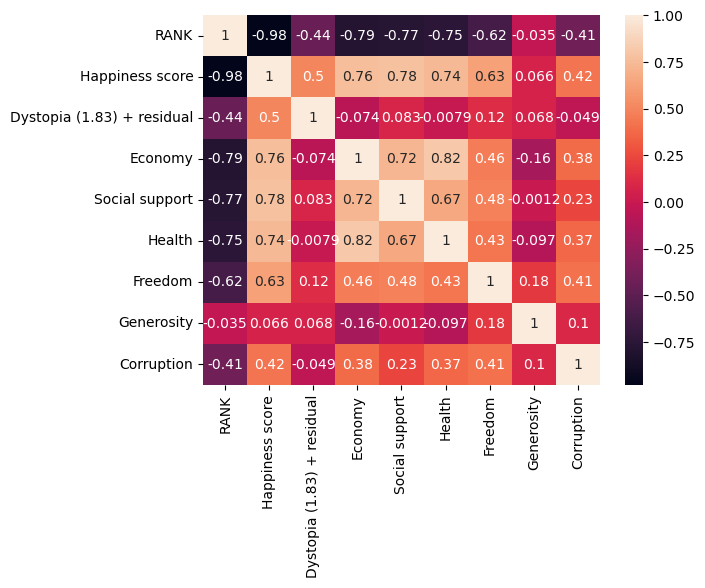

In [17]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df22.corr(), annot=True)
plt.show()

It is obeserved that between the six key variables i.e., Economy, Social support, Health, Freedom, Generosity and Corruption, mostly they are positive correlated to **Happiness Score**. However, Generosity has relatively low possitive correlation followed by Corruption.

In [18]:
# set option for displaying max columns and rows
pd.set_option('display.max_rows',150)

In [19]:
# sort the values by Happiness score in descending order
df22.sort_values(by=['Happiness score'],ascending=False)

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,7.82,2.52,1.89,1.26,0.77,0.74,0.11,0.53
1,2,Denmark,7.64,2.23,1.95,1.24,0.78,0.72,0.19,0.53
2,3,Iceland,7.56,2.32,1.94,1.32,0.80,0.72,0.27,0.19
3,4,Switzerland,7.51,2.15,2.03,1.23,0.82,0.68,0.15,0.46
4,5,Netherlands,7.41,2.14,1.95,1.21,0.79,0.65,0.27,0.42
5,6,Luxembourg*,7.40,2.04,2.21,1.15,0.79,0.70,0.12,0.39
6,7,Sweden,7.38,2.00,1.92,1.20,0.80,0.72,0.22,0.51
7,8,Norway,7.36,1.92,2.00,1.24,0.79,0.73,0.22,0.47
8,9,Israel,7.36,2.63,1.83,1.22,0.82,0.57,0.16,0.14
9,10,New Zealand,7.20,1.95,1.85,1.24,0.75,0.68,0.25,0.48


Based on the correlation heatmap, it shows that ***RANK*** has **high negative relationship** with ***Happiness* score**. From the table above which sorted in descending order based on Happiness score shows that the rankings are depending on the happiness score.

In [20]:
# reset display option to default
pd.reset_option('display.max_rows')
df22

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Economy,Social support,Health,Freedom,Generosity,Corruption
0,1,Finland,7.82,2.52,1.89,1.26,0.77,0.74,0.11,0.53
1,2,Denmark,7.64,2.23,1.95,1.24,0.78,0.72,0.19,0.53
2,3,Iceland,7.56,2.32,1.94,1.32,0.80,0.72,0.27,0.19
3,4,Switzerland,7.51,2.15,2.03,1.23,0.82,0.68,0.15,0.46
4,5,Netherlands,7.41,2.14,1.95,1.21,0.79,0.65,0.27,0.42
...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.47,0.19,1.50,0.81,0.28,0.57,0.01,0.10
142,143,Rwanda*,3.27,0.54,0.79,0.13,0.46,0.62,0.19,0.54
143,144,Zimbabwe,2.99,0.55,0.95,0.69,0.27,0.33,0.11,0.10
144,145,Lebanon,2.95,0.22,1.39,0.50,0.63,0.10,0.08,0.03


In [21]:
# export cleaned dataframe for data visualization in Tableau
df22.to_excel('Happiness_score_2022.xlsx', index=False)